In [1]:
'''从零开始实现线性回归'''

'从零开始实现线性回归'

In [2]:
%matplotlib inline
#调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成figure画布的时候，直接在python console里面生成图像。

import random
import torch
from d2l import torch as d2l

sample 0's feature: tensor([-1.7515,  1.0378])
sample 0's label: tensor([-2.8235])


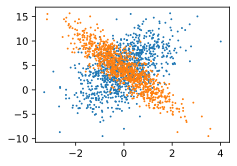

In [3]:
# 生成训练样本
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声 """
    X = torch.normal(0, 1, (num_examples, len(w))) # X形状为样本数*特征长度
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1)) #y转为列向量

#设置真实的w和b
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

# 展示样本数据
# 每个样本具有两个特征，一共有1000个样本

# 输出第0个样本的特征和标签
print('sample 0\'s feature:',features[0])
print('sample 0\'s label:',labels[0])

# 展示所有的样本数据
d2l.set_figsize()
# 点(第0列特征，label)，点的大小为1
d2l.plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)
# 点(第1列特征，label)，点的大小为1
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [4]:
# 从样本中随机取出batch_size个样本作为小批量的样本
def data_iter(batch_size, features, labels):
    """构造PyTorch数据迭代器"""
    num_examples = len(features)
    # indices：长度为样本个数的随机序列编号
    indices = list(range(num_examples))
    random.shuffle(indices) #random.shuffle()将序列的所有元素随机排序
    #print(indices)
    # 通过随机序列号每次从样本中选取batch_size个样本
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        #print("batch_indices:",batch_indices)
        yield features[batch_indices],labels[batch_indices]
        #yield将函数变成一个生成器，语意类似于return，参考：https://blog.csdn.net/mieleizhi0522/article/details/82142856/

# # 小测试
# batch_size = 3
# features_tem = features[:12]
# labels_tem = labels[:12]
# for X,y in data_iter(batch_size, features_tem, labels_tem):
#     print(X,'\n',y)
#     break

# 测试
# 输出第一个小批量的样本（内含batch_size个样本）
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[-0.6942,  0.7989],
        [ 0.2974,  1.7987],
        [-1.1519,  1.0594],
        [-0.9501, -0.3535],
        [ 0.3274, -0.0962],
        [-0.8986,  1.5174],
        [ 0.0743,  0.5696],
        [-0.1678,  2.2906],
        [ 1.2463,  0.1795],
        [ 2.0375,  0.8858]]) 
 tensor([[ 0.0914],
        [-1.3189],
        [-1.7146],
        [ 3.4966],
        [ 5.1870],
        [-2.7503],
        [ 2.4085],
        [-3.9235],
        [ 6.0860],
        [ 5.2436]])


In [5]:
# # 初始化模型参数
# w = torch.normal(0, 0.01, size=(2,1),requires_grad=True) #随机生成一个size为2*1的满足正态分布(0,0.01)的张量作为w的初始值,需要计算梯度
# b = torch.zeros(1, requires_grad=True) #b的初始值设为0，需要计算梯度
# print(w,b)

In [6]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [7]:
def squared_loss(y_hat, y):
    """均方损失"""
    return ((y_hat - y.reshape(y_hat.shape))**2)*0.5

In [8]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            #print("param:",param)
            #print("param.grad:",param.grad)
            param -= lr * param.grad / batch_size
            param.grad.zero_() #梯度清零

In [9]:
lr = 0.03 #学习率
num_epochs = 3 #重复三次
batch_size = 10 #每个小批量的样本数量
net = linreg #使用线性回归模型
loss = squared_loss #使用均方损失

# 初始化模型参数
# w:初始值为随机生成的一个size为2*1且满足正态分布(0,0.01)的张量,需要计算梯度
# b:初始值设为0，需要计算梯度
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) 
b = torch.zeros(1, requires_grad=True)

# # 小测试
# batch_size = 3
# features_tem = features[:6]
# labels_tem = labels[:6]
# print("ori[w,b]:", [w,b])

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        #print("X:", X)
        #print("y:", y)
        #print("y_hat:",net(X_tem,w,b))
        l = loss(net(X,w,b), y) #计算每一个小批量损失
        l.sum().backward() #反向传播损失，以计算L/w的梯度
        sgd([w,b], lr, batch_size)
        #print("loss:", l)
        #print("[w,b]:",[w,b])
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'\nepoch {epoch + 1}, loss {float(train_l.mean()):f}')
        print('\t w:',w.reshape(true_w.shape).numpy())
        print('\t b:',b.detach().numpy())

print(f'\ntrue_w,true_b:',true_w.detach().numpy(),true_b)
print(f'w的估计误差: {(true_w - w.reshape(true_w.shape)).detach().numpy()}')
print(f'b的估计误差: {(true_b - b).detach().numpy()}')


epoch 1, loss 0.032138
	 w: [ 1.9241794 -3.2598498]
	 b: [4.007103]

epoch 2, loss 0.000113
	 w: [ 1.9974852 -3.394459 ]
	 b: [4.190701]

epoch 3, loss 0.000050
	 w: [ 2.0006506 -3.4001322]
	 b: [4.199633]

true_w,true_b: [ 2.  -3.4] 4.2
w的估计误差: [-0.00065064  0.00013208]
b的估计误差: [0.00036669]


In [10]:
# # 对上模块的示例解释：requires_grad=True，计算w的梯度
# true_w = torch.tensor([1.,1.9])
# X = torch.tensor([[1.,2.],[2,4],[3,3]])
# y = torch.matmul(X, true_w) + 0.1
# print('y:\n',y)

# w = torch.tensor([1.,2.], requires_grad=True)
# y_hat = torch.matmul(X, w) + 0.1
# print('y_hat:\n',y_hat)

# l = (y - y_hat) ** 2 /2
# print('l:\n',l)

# l.sum().backward()

# print('w:',w)
# print("w.grad:",w.grad)
# print('Gradient calculation formula is [torch.matmul((y_hat-y),X)] :\n',torch.matmul((y_hat-y),X))

In [11]:
'''线性回归的简洁实现'''

'线性回归的简洁实现'

In [12]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2., -3.4])
true_b = 4.2
# 用d2l生成1000个样本
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [13]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    # DataLoader: 构建可迭代的数据装载器
    return data.DataLoader(dataset, batch_size, shuffle=is_train) #shuffle:设置is_train以打乱顺序

# 测试
# 输出第一个小批量的样本（内含batch_size个样本）
batch_size = 10
data_iter = load_array((features, labels), batch_size)
print(next(iter(data_iter)))

[tensor([[ 1.0223, -0.8001],
        [ 0.3264,  1.8152],
        [-0.9598,  2.8716],
        [-1.3365, -0.2880],
        [-0.8557,  1.5730],
        [ 0.0588,  0.1757],
        [-0.9612,  0.9276],
        [ 1.0162, -0.7083],
        [-0.2650,  0.8503],
        [-1.3786, -0.9856]]), tensor([[ 8.9848],
        [-1.3199],
        [-7.4689],
        [ 2.4987],
        [-2.8792],
        [ 3.7266],
        [-0.8883],
        [ 8.6424],
        [ 0.7666],
        [ 4.7794]])]


In [14]:
from torch import nn

# Sequential: 一个有序的容器，神经网络模块将按照在传入构造器的顺序依次被添加到计算图中执行
net = nn.Sequential(nn.Linear(2, 1)) #输入维度为2，输出维度为1

# 均方误差：MSELoss类
loss = nn.MSELoss()
# 随机梯度下降: 实例化SGD实例
trainer = torch.optim.SGD(net.parameters(), lr=0.03) #学习率为0.03
# 初始化模型参数
net[0].weight.data.normal_(0, 0.01) #初始化w
net[0].bias.data.fill_(0) #初始化b
num_epochs = 3 #重复三次
batch_size = 10
data_iter = load_array((features, labels), batch_size)

for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X), y) #计算每一个小批量损失
        trainer.zero_grad() #梯度清零
        l.backward() #计算反向传播损失，自动求sum
        trainer.step() #进行模型更新
    l = loss(net(features), labels)
    print(f'\nepoch {epoch + 1}, loss {float(l):f}')
    w,b = net[0].weight, net[0].bias
    print('\t w:',w.reshape(true_w.shape).detach().numpy())
    print('\t b:',b.detach().numpy())

print(f'\ntrue_w,true_b:',true_w.detach().numpy(),true_b)
print(f'w的估计误差: {(true_w - w.reshape(true_w.shape)).detach().numpy()}')
print(f'b的估计误差: {(true_b - b).detach().numpy()}')


epoch 1, loss 0.000315
	 w: [ 1.9948045 -3.38936  ]
	 b: [4.189932]

epoch 2, loss 0.000101
	 w: [ 1.9988103 -3.3999221]
	 b: [4.1990924]

epoch 3, loss 0.000100
	 w: [ 1.9990996 -3.3999732]
	 b: [4.200147]

true_w,true_b: [ 2.  -3.4] 4.2
w的估计误差: [ 9.0038776e-04 -2.6941299e-05]
b的估计误差: [-0.00014734]
